In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy
from matplotlib import rcParams
from sympy.plotting import plot_parametric,plot
rcParams['font.family'] = 'Yu Gothic' 
rcParams['axes.unicode_minus'] = False

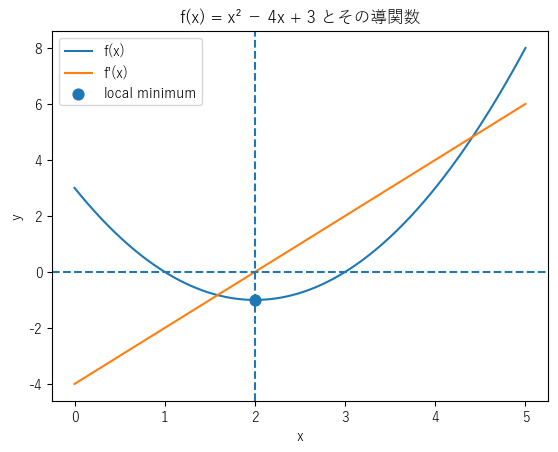

In [2]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# 1. 数式まわり
x       = sp.symbols('x')
f       = x**2 - 4*x + 3          # 元の関数
f_prime = sp.diff(f, x)           # 導関数

crit_x  = sp.solve(f_prime)[0]    # 極値の x 座標 (=2)
crit_y  = f.subs(x, crit_x)       # 極値の y 座標 (=-1)

# 2. 数値化して描画
f_num  = sp.lambdify(x, f, 'numpy')
fp_num = sp.lambdify(x, f_prime, 'numpy')

xs  = np.linspace(0, 5, 400)
plt.figure()
plt.plot(xs, f_num(xs),  label='f(x)')
plt.plot(xs, fp_num(xs), label="f'(x)")

# 極小点をマーカーで表示
plt.scatter([float(crit_x)], [float(crit_y)],
            marker='o', s=60, label='local minimum')
plt.axvline(float(crit_x), linestyle='--')  # 補助線（任意）
plt.axhline(0, linestyle='--')
plt.title('f(x) = x² − 4x + 3 とその導関数')
plt.xlabel('x');  plt.ylabel('y');  plt.legend()
plt.show()


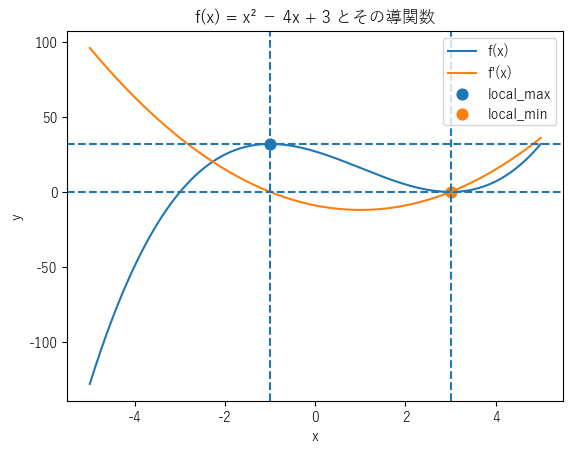

In [3]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# 1. 数式まわり
x       = sp.symbols('x')
f       = x**3 - 3*x**2 -9*x + 27  
f_prime = sp.diff(f, x)           

crit_x  = sp.solve(f_prime) 
crit_y  = [f.subs(x, e) for e in crit_x] 

# 2. 数値化して描画
f_num  = sp.lambdify(x, f, 'numpy')
fp_num = sp.lambdify(x, f_prime, 'numpy')

xs  = np.linspace(-5, 5, 400)
plt.figure()
plt.plot(xs, f_num(xs),  label='f(x)')
plt.plot(xs, fp_num(xs), label="f'(x)")

# 極小点をマーカーで表示
for a,b in zip(crit_x,crit_y):
    plt.scatter([a], [b],
                marker='o', s=60, 
                label=('local_min' if b==min(crit_y) else 'local_max'))
    plt.axvline(float(a), linestyle='--') 
    plt.axhline(b, linestyle='--')
plt.title('f(x) = x² − 4x + 3 とその導関数')
plt.xlabel('x');  plt.ylabel('y');  plt.legend()
plt.show()


In [4]:
#24 実験的に勾配を観察する
import sympy as sp
import numpy as np
import pandas as pd

# 変数xを定義
x = sp.Symbol('x')

# 関数fxを定義
fx = x**4 - 4*x

# 導関数df_dxを計算
df_dx = sp.diff(fx, x)

# lambdifyを使ってSymPyの式をNumPyで計算できる関数に変換
f_numpy = sp.lambdify(x, fx, 'numpy')
df_numpy = sp.lambdify(x, df_dx, 'numpy')

# xの値を生成 (-5から5まで11点)
xs = np.linspace(-5, 5, 11)

# 関数fxと導関数df_dxの値を計算
fx_values = f_numpy(xs)
df_dx_values = df_numpy(xs)

# 結果をpandas DataFrameに格納してテーブルとして表示
df_results = pd.DataFrame({
    'x': xs,
    'f(x)': fx_values,
    "f'(x)": df_dx_values
})


print(df_results)


# もし全ての行を表示したい場合は、pandasの表示オプションを設定できます。
# pd.set_option('display.max_rows', None) # 全ての行を表示
# print(df_results)

      x   f(x)  f'(x)
0  -5.0  645.0 -504.0
1  -4.0  272.0 -260.0
2  -3.0   93.0 -112.0
3  -2.0   24.0  -36.0
4  -1.0    5.0   -8.0
5   0.0    0.0   -4.0
6   1.0   -3.0    0.0
7   2.0    8.0   28.0
8   3.0   69.0  104.0
9   4.0  240.0  252.0
10  5.0  605.0  496.0


3*t**2 - 12*t
6*t - 12


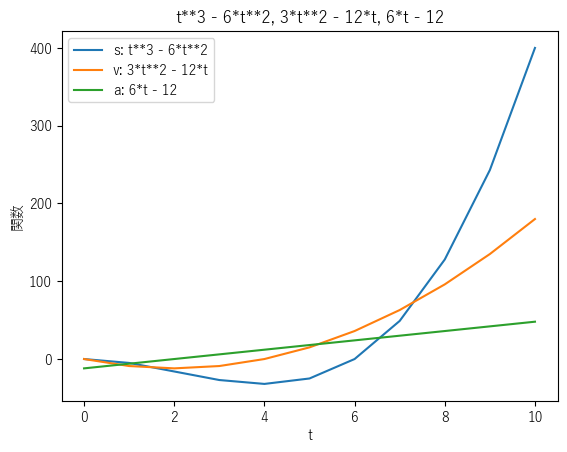

In [5]:
#25
t=sympy.Symbol('t')
s=t**3-6*t**2
ds_dt=sp.diff(s,t)
v=ds_dt
dv_dt=sp.diff(v,t)
a=dv_dt
print(v)
print(a)

# lambdifyを使ってSymPyの式をNumPyで計算できる関数に変換
s_numpy = sp.lambdify(t, s, 'numpy')
v_numpy = sp.lambdify(t, v, 'numpy')
a_numpy = sp.lambdify(t, a, 'numpy')

# xの値を生成 (0から10まで11点)
xs = np.linspace(0, 10, 11)

plt.figure()
plt.plot(xs, s_numpy(xs), label=f's: {s}')
plt.plot(xs, v_numpy(xs), label=f"v: {v}")
plt.plot(xs, a_numpy(xs), label=f'a: {a}')
plt.title(f'{s}, {v}, {a}')
plt.xlabel('t');  plt.ylabel('関数');  plt.legend()
plt.show()

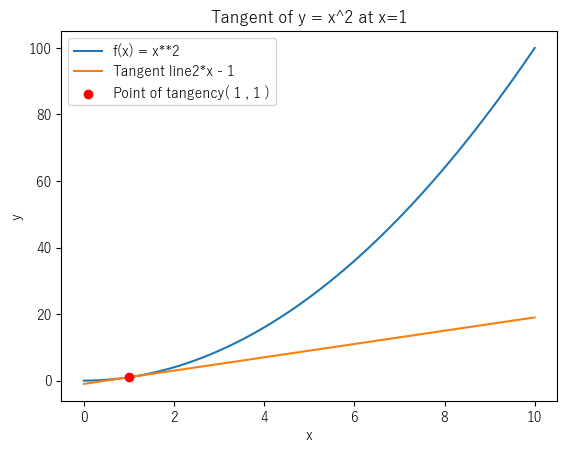

In [12]:
#26曲線の接線
x=sympy.Symbol('x')
fx=x**2
df_dx=sympy.diff(fx,x)
df_numpy = sp.lambdify(x, df_dx, 'numpy')
fx_numpy = sp.lambdify(x, fx, 'numpy')
px = 1
fpx = fx_numpy(px)      # y座標
dfpx = df_numpy(px)     # 接線の傾き
slope = dfpx
b = fpx - slope*px
tl = slope*x + b
tl_numpy = sp.lambdify(x, tl, 'numpy')
xs = np.linspace(0, 10, 100)

plt.figure()
# 元の関数グラフ
plt.plot(xs, fx_numpy(xs), label=f'f(x) = {fx}')
# 接線
plt.plot(xs, tl_numpy(xs), label=f'Tangent line{tl}')
# 接点を赤い点で表示
plt.scatter(px, fpx, color='red', zorder=5, label=f'Point of tangency( {px} , {fpx} )')

plt.title("Tangent of y = x^2 at x=1")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

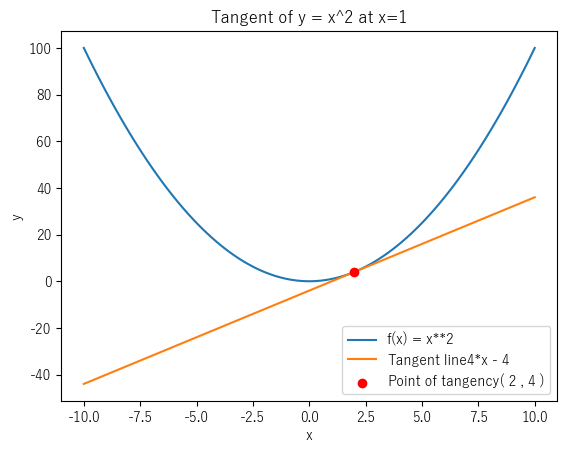

In [15]:
#26曲線の接線
x=sympy.Symbol('x')
fx=x**2
df_dx=sympy.diff(fx,x)
df_numpy = sp.lambdify(x, df_dx, 'numpy')
fx_numpy = sp.lambdify(x, fx, 'numpy')
px = 2
fpx = fx_numpy(px)      # y座標
dfpx = df_numpy(px)     # 接線の傾き
slope = dfpx
b = fpx - slope*px
tl = slope*x + b
tl_numpy = sp.lambdify(x, tl, 'numpy')
xs = np.linspace(-10, 10, 100)

plt.figure()
# 元の関数グラフ
plt.plot(xs, fx_numpy(xs), label=f'f(x) = {fx}')
# 接線
plt.plot(xs, tl_numpy(xs), label=f'Tangent line{tl}')
# 接点を赤い点で表示
plt.scatter(px, fpx, color='red', zorder=5, label=f'Point of tangency( {px} , {fpx} )')

plt.title("Tangent of y = x^2 at x=1")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [29]:
#28
def exp_mac(a,n=1):
    f=1
    r=1
    for i in range(1,n+1):
        f*=i
        r+=a**i/f
    return r
b=0
print(np.exp(b))
print(exp_mac(b))

1.0
1.0


In [ ]:
#29
